# 1. Linear Model, Tabular Dataset

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

C:\Users\Behnam\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Behnam\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Behnam\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
df = pd.read_csv('D:\Google Drive\Datasets\BreastCancer.csv')
df.drop(columns = 'Id', inplace = True)
df

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,benign
679,2,1,1,1,2,1,1,1,1,benign
680,5,10,10,3,7,3,8,10,2,malignant
681,4,8,6,4,3,4,10,6,1,malignant


### Rearrange columns

In [4]:
cols = df.columns.to_list()
cols

['Cl.thickness',
 'Cell.size',
 'Cell.shape',
 'Marg.adhesion',
 'Epith.c.size',
 'Bare.nuclei',
 'Bl.cromatin',
 'Normal.nucleoli',
 'Mitoses',
 'Class']

In [5]:
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,Class,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,benign,5,1,1,1,2,1,3,1,1
1,benign,5,4,4,5,7,10,3,2,1
2,benign,3,1,1,1,2,2,3,1,1
3,benign,6,8,8,1,3,4,3,7,1
4,benign,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...
678,benign,3,1,1,1,3,2,1,1,1
679,benign,2,1,1,1,2,1,1,1,1
680,malignant,5,10,10,3,7,3,8,10,2
681,malignant,4,8,6,4,3,4,10,6,1


### Split and create Test, Tarin dataframes

In [6]:
train, test = train_test_split(df, test_size = 0.3, stratify = df.Class, random_state = 42 )

In [7]:
len(train), len(test)

(478, 205)

In [8]:
# check the proportion of 2 classes in train data
round(len(train[train.Class == 'malignant'])/len(train), 2)

0.35

In [9]:
# check the proportion of 2 classes in test data
round(len(test[test.Class == 'malignant'])/len(test), 2)

0.35

In [10]:
# set new indices for both dataframes and drop the previus indices
train.reset_index(drop=True), test.reset_index(drop = True)

(         Class  Cl.thickness  Cell.size  Cell.shape  Marg.adhesion  \
 0       benign             1          1           1              1   
 1       benign             1          1           2              1   
 2       benign             1          1           1              1   
 3       benign             5          1           1              1   
 4    malignant             6          3           2              1   
 ..         ...           ...        ...         ...            ...   
 473     benign             5          1           1              3   
 474  malignant             9          5           5              4   
 475  malignant            10          7           7              6   
 476     benign             2          1           1              1   
 477     benign             1          1           1              1   
 
      Epith.c.size  Bare.nuclei  Bl.cromatin  Normal.nucleoli  Mitoses  
 0               2            1            3                1        1  


In [11]:
train.to_csv('DataFrames\BreastCancer_train.csv', index = False)
test.to_csv('DataFrames\BreastCancer_test.csv', index = False)

In [12]:
df_train = pd.read_csv('DataFrames\BreastCancer_train.csv')
df_test= pd.read_csv('DataFrames\BreastCancer_test.csv')

In [13]:
df_train

,Class,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,benign,1,1,1,1,2,1,3,1,1
1,benign,1,1,2,1,2,1,2,1,1
2,benign,1,1,1,1,2,1,3,1,1
3,benign,5,1,1,1,2,1,2,1,1
4,malignant,6,3,2,1,3,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...
473,benign,5,1,1,3,2,1,1,1,1
474,malignant,9,5,5,4,4,5,4,3,3
475,malignant,10,7,7,6,4,10,4,1,2
476,benign,2,1,1,1,2,1,2,1,1


In [14]:
df_test

,Class,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,benign,4,1,1,1,2,1,3,1,1
1,benign,3,1,1,1,2,1,1,1,1
2,benign,6,1,1,3,2,1,1,1,1
3,benign,3,1,1,1,2,1,1,1,1
4,benign,5,4,4,5,7,10,3,2,1
...,...,...,...,...,...,...,...,...,...,...
200,benign,6,9,7,5,5,8,4,2,1
201,malignant,7,8,8,7,3,10,7,2,3
202,benign,3,1,1,1,2,1,2,1,1
203,benign,3,1,1,1,2,1,2,1,1


### Now we need to create a customized dataset class

In [15]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

class make_dataset(Dataset):
    def __init__(self, dataframe):
        if type(dataframe) == str: # when input is the name of a csv file
            df = pd.read_csv(dataframe)
        else: # when a dataframe is directly given
            df = dataframe
            
        X = df.iloc[:, 1:].values
        y = df.Class.values
         
        X = MinMaxScaler().fit_transform(X)
        self.X = torch.tensor(X, dtype = torch.float32) # these are decimals
        
        y = LabelEncoder().fit_transform(y)
        self.y = torch.tensor(y, dtype = torch.float32) # these are 0 or 1 floats
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):    
        return self.X[idx], self.y[idx]

In [16]:
# To get clas map after LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Class'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{'benign': 0, 'malignant': 1}


### Let's create train abd test datasets


In [17]:
train_data = make_dataset(df_train)
test_data = make_dataset(df_test)

In [18]:
df_train.head()

,Class,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,benign,1,1,1,1,2,1,3,1,1
1,benign,1,1,2,1,2,1,2,1,1
2,benign,1,1,1,1,2,1,3,1,1
3,benign,5,1,1,1,2,1,2,1,1
4,malignant,6,3,2,1,3,4,4,1,1


In [19]:
# compare the values of make_dataset with actual values
train_data[:5]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.1111, 0.0000, 0.2222, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.1111, 0.0000, 0.1111, 0.0000, 0.1111, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.1111, 0.0000, 0.2222, 0.0000, 0.0000],
         [0.4444, 0.0000, 0.0000, 0.0000, 0.1111, 0.0000, 0.1111, 0.0000, 0.0000],
         [0.5556, 0.2222, 0.1111, 0.0000, 0.2222, 0.3333, 0.3333, 0.0000, 0.0000]]),
 tensor([0., 0., 0., 0., 1.]))

In [20]:
train_data[5][0].shape

torch.Size([9])

### Creating dataloaders
- And the test a batch in each dataloader

In [21]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 2, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 5, drop_last=True )

In [22]:
data_iter = iter(train_loader)

predictors, target = next(data_iter)
print(predictors.shape, target.shape) # each train batch has 2 elents in it

torch.Size([2, 9]) torch.Size([2])


In [23]:
data_iter = iter(test_loader)

predictors, target = next(data_iter)
print(predictors.shape, target.shape) # each test batch has 2 elents in it

torch.Size([5, 9]) torch.Size([5])


### Design the model
- linear model

In [24]:
import torch
import torch.nn as nn

class binary_model(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(9, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc_out = nn.Linear(32, 1)
        
    def forward(self, inputs):
        x = torch.relu(self.fc1(inputs))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc_out(x))
        
        return x#.squeeze()

        

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [26]:
import torch.optim as optim

model = binary_model()
model.to(device)
criterion = nn.BCELoss() # this is the Loss function
optimizer = optim.RMSprop(model.parameters()) # combination of momentum and adaptive learning rate

### Train the model

In [27]:

def train_linear(model, data_loader, optimizer, criterion):

    model.to(device)

    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for inputs, labels in data_loader:
        
        optimizer.zero_grad()
        
        inputs = inputs.to(device)   
        labels = labels.to(device)
        #print(labels.shape)
        #print(model(inputs))
        # output of the model is: (batch_size, 1) and we get rid of 1 with squeeze(dim=1)
        predictions = model(inputs).squeeze(1)
        #print(predictions.shape)
        #print('--------------')
        loss = criterion(predictions, labels)
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == labels).float()
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(data_loader), epoch_acc / len(data_loader)

In [28]:
num_epochs = 5

for epoch in range(num_epochs):

    train_loss, train_acc = train_linear(model, train_loader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

| Epoch: 01 | Train Loss: 0.139 | Train Acc: 95.19% 
| Epoch: 02 | Train Loss: 0.077 | Train Acc: 97.07% 
| Epoch: 03 | Train Loss: 0.065 | Train Acc: 97.91% 
| Epoch: 04 | Train Loss: 0.072 | Train Acc: 97.28% 
| Epoch: 05 | Train Loss: 0.061 | Train Acc: 98.33% 


### Evaluate the model

### Let's apply uniform weights

In [29]:
import numpy as np

# takes in a module and applies the specified weight initialization
def weights_init_uniform(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # apply a uniform distribution to the weights and a bias=0
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)


In [30]:
# create a new model with these weights

import torch.optim as optim

model = binary_model()
model.to(device)
criterion = nn.BCELoss() # this is the Loss function
optimizer = optim.RMSprop(model.parameters())
model.apply(weights_init_uniform)

binary_model(
  (fc1): Linear(in_features=9, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=32, bias=True)
  (fc_out): Linear(in_features=32, out_features=1, bias=True)
)

In [31]:
def evaluate_linear(model, data_loader, criterion):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    #deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for inputs, labels in data_loader:
        
            inputs = inputs.to(device).float() # batch_size must be the 1st dimension so we don't use .T
            #pfam = pfam.float() # the model expects tensor of float type 
          
            labels = labels.to(device)

            # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
            predictions = model(inputs).squeeze(1)

            loss = criterion(predictions, labels)

            rounded_preds = torch.round(predictions)
            correct = (rounded_preds == labels).float()

            acc = correct.sum() / len(correct)

            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(data_loader), epoch_acc / len(data_loader)

In [32]:
N_EPOCHS = 5
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    #train the model
    train_loss, train_acc = train_linear(model, train_loader, optimizer, criterion)

    #evaluate the model
    valid_loss, valid_acc = evaluate_linear(model, test_loader, criterion)
    
    #save the best model
#     if valid_loss < best_valid_loss:
#         best_valid_loss = valid_loss
#         torch.save(model.state_dict(), 'models\linear_model_saved_weights.pt')
    
    print(f"""Epoch {epoch+1}: Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%' \
 | Validation Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%'
    --------------------------------------------------------------------------------------------""")

Epoch 1: Train Loss: 0.161 | Train Acc: 94.14%'  | Validation Loss: 0.118 |  Val. Acc: 97.07%'
    --------------------------------------------------------------------------------------------
Epoch 2: Train Loss: 0.085 | Train Acc: 96.86%'  | Validation Loss: 0.131 |  Val. Acc: 97.07%'
    --------------------------------------------------------------------------------------------
Epoch 3: Train Loss: 0.065 | Train Acc: 97.91%'  | Validation Loss: 0.127 |  Val. Acc: 97.07%'
    --------------------------------------------------------------------------------------------
Epoch 4: Train Loss: 0.059 | Train Acc: 98.12%'  | Validation Loss: 0.170 |  Val. Acc: 95.61%'
    --------------------------------------------------------------------------------------------
Epoch 5: Train Loss: 0.086 | Train Acc: 97.28%'  | Validation Loss: 0.135 |  Val. Acc: 97.07%'
    --------------------------------------------------------------------------------------------


In [33]:
from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance
from scipy import stats

In [34]:
ig = IntegratedGradients(model)

In [35]:
test_data[:][0].shape

torch.Size([205, 9])

In [36]:
test_data[:][0]

tensor([[0.3333, 0.0000, 0.0000,  ..., 0.2222, 0.0000, 0.0000],
        [0.2222, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.5556, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2222, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000],
        [0.2222, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000]])

In [37]:
test_data[:][0].requires_grad_()

tensor([[0.3333, 0.0000, 0.0000,  ..., 0.2222, 0.0000, 0.0000],
        [0.2222, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.5556, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2222, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000],
        [0.2222, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000]],
       requires_grad=True)

In [38]:
test_input_tensor = test_data[:][0]
test_input_tensor.requires_grad_()

tensor([[0.3333, 0.0000, 0.0000,  ..., 0.2222, 0.0000, 0.0000],
        [0.2222, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.5556, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2222, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000],
        [0.2222, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.1111, 0.0000, 0.0000]],
       requires_grad=True)

In [39]:
target_input_tensor = test_data[:][1]
target_input_tensor = target_input_tensor.type(torch.LongTensor)
target_input_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0])

In [54]:
attr = ig.attribute(test_input_tensor.to(device), target = 0 , n_steps=150)
attr = attr.detach().cpu().numpy()

In [55]:
attr[:5]

array([[9.90400421e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.50603945e-05, 0.00000000e+00, 2.64208314e-05, 0.00000000e+00,
        0.00000000e+00],
       [4.63662657e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.75893349e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.20572487e-04, 0.00000000e+00, 0.00000000e+00, 3.23262384e-04,
        6.38159091e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.63662657e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.75893349e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.09392755e-01, 1.25939767e-01, 1.25585492e-01, 1.25491553e-01,
        2.40405619e-02, 4.28989283e-01, 3.41866882e-02, 1.48277086e-02,
        0.00000000e+00]])

In [56]:
attr.shape

(205, 9)

In [57]:
feature_names = list(df_test.columns[1:])
feature_names

['Cl.thickness',
 'Cell.size',
 'Cell.shape',
 'Marg.adhesion',
 'Epith.c.size',
 'Bare.nuclei',
 'Bl.cromatin',
 'Normal.nucleoli',
 'Mitoses']

Average Feature Importances
Cl.thickness :  0.046
Cell.size :  0.067
Cell.shape :  0.063
Marg.adhesion :  0.038
Epith.c.size :  0.004
Bare.nuclei :  0.091
Bl.cromatin :  0.023
Normal.nucleoli :  0.015
Mitoses :  0.017


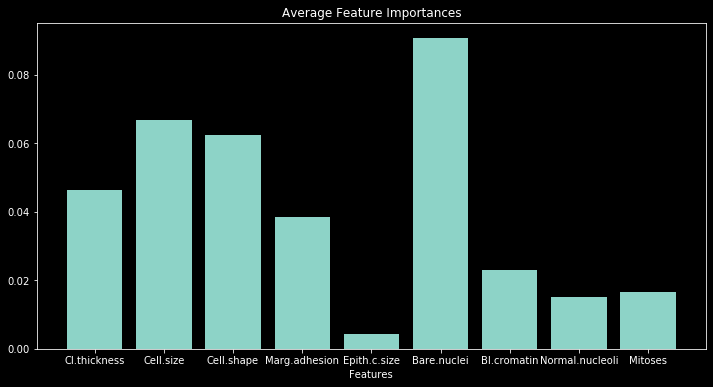

In [58]:
# Helper method to print importances and visualize distribution
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)
visualize_importances(feature_names, np.mean(attr, axis=0))

In [73]:
pd.DataFrame(list(zip(feature_names, np.mean(attr, axis=0)*1000)), columns=['freatures','Dimportanceay'])

,freatures,Dimportanceay
0,Cl.thickness,46.473710
1,Cell.size,66.735816
2,Cell.shape,62.548809
3,Marg.adhesion,38.373984
4,Epith.c.size,4.300856
5,Bare.nuclei,90.706406
6,Bl.cromatin,22.971515
7,Normal.nucleoli,15.201608
8,Mitoses,16.598976


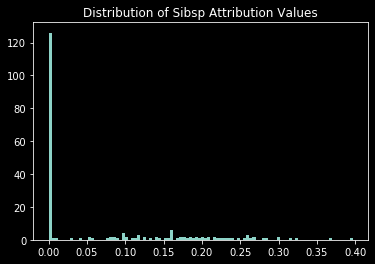

In [74]:
plt.hist(attr[:,1], 100);
plt.title("Distribution of Sibsp Attribution Values");

In [78]:
attr.shape

(205, 9)

In [77]:
attr[:,1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.25939767e-01, 0.00000000e+00, 1.32838489e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.41660089e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.75920251e-03,
       0.00000000e+00, 5.86868263e-04, 3.65755553e-04, 8.66141902e-05,
       2.42019939e-01, 8.02755302e-02, 0.00000000e+00, 1.03165157e-01,
       0.00000000e+00, 1.69499132e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.24458763e-01,
       0.00000000e+00, 2.14367452e-01, 0.00000000e+00, 1.25671204e-04,
       3.01278343e-01, 2.24730426e-01, 2.58127432e-01, 1.47727592e-04,
       1.60740663e-01, 0.00000000e+00, 1.18384028e-01, 0.00000000e+00,
       4.21738798e-02, 7.66465915e-02, 0.00000000e+00, 0.00000000e+00,
       7.54541614e-03, 0.00000000e+00, 0.00000000e+00, 2.82593411e-02,
      